# **Project - Artificial Neural Networks: Street View Housing Number Digit Recognition**

# Marks: 30

Welcome to the project on classification using Artificial Neural Networks. We will work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a feed foward neural network model that can identify the digits in the images. 

-------------
### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [4]:
print(tf.__version__)

2.8.0


## **Load the dataset**
- Let us now load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [5]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
#X_train.shape
h5f.close()

Let's check the number of images in the training and testing data.

In [6]:
len(X_train), len(X_test)

(42000, 18000)

- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

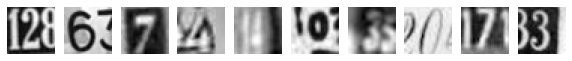

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [7]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to flatten them. Figure out the required shape
- Normalise the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [8]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [9]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

#### **Question 1: Normalize the train and test data (2 Marks)**

In [10]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (1024,)

First image:
 [0.12968785 0.11866706 0.10530196 ... 0.19477727 0.19942354 0.20799099]


In [11]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [12]:
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

In [13]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First hidden layer with **64 nodes and relu activation** and the input shape which is used above
 - Second hidden layer with **32 nodes and relu activation**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model.
- Call the function and store the model in a new variable 
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

#### **Question 2: Build and train a ANN model as per the above mentioned architecture (10 Marks)**

In [14]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence

    # First hidden layer with 64 nodes and relu activation and the input shape which is used above
    model.add(Dense(64, activation='relu', input_shape=(1024,)))

    # Second hidden layer with 32 nodes and relu activation
    model.add(Dense(32, activation='relu'))

    # Output layer with softmax activation and number of nodes equal to the number of classes, which was 10 from above
    model.add(Dense(10, activation='softmax'))
    
    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.learning_rate = 0.001

    #compile the model with the categorical_crossentropy loss, adam optimizer (learning_rate = 0.001), and accuracy metric
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [15]:
# Build the model
model_1 = nn_model_1()

In [16]:
#Print the summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Fit the model
history_model_1 = model_1.fit(X_train, 
                    y_train,
                    validation_split=0.2,
                    batch_size = 128, 
                    epochs=20, 
                    verbose=1)

#Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and 20 epochs. Store the model building history to use later for visualization.

Epoch 1/20
263/263 [==============================] - 3s 9ms/step - loss: 2.2993 - accuracy: 0.1179 - val_loss: 2.2594 - val_accuracy: 0.1463
Epoch 2/20
263/263 [==============================] - 2s 7ms/step - loss: 2.1130 - accuracy: 0.2276 - val_loss: 1.9376 - val_accuracy: 0.3279
Epoch 3/20
263/263 [==============================] - 2s 8ms/step - loss: 1.7953 - accuracy: 0.3824 - val_loss: 1.6499 - val_accuracy: 0.4551
Epoch 4/20
263/263 [==============================] - 2s 7ms/step - loss: 1.5726 - accuracy: 0.4828 - val_loss: 1.4957 - val_accuracy: 0.5094
Epoch 5/20
263/263 [==============================] - 2s 8ms/step - loss: 1.4604 - accuracy: 0.5268 - val_loss: 1.4267 - val_accuracy: 0.5357
Epoch 6/20
263/263 [==============================] - 2s 7ms/step - loss: 1.4008 - accuracy: 0.5503 - val_loss: 1.3652 - val_accuracy: 0.5613
Epoch 7/20
263/263 [==============================] - 2s 7ms/step - loss: 1.3588 - accuracy: 0.5682 - val_loss: 1.3282 - val_accuracy: 0.5799
Epoch 

### **Plotting the validation and training accuracies**

#### **Question 3: Write your observations on the below plot (2 Marks)**

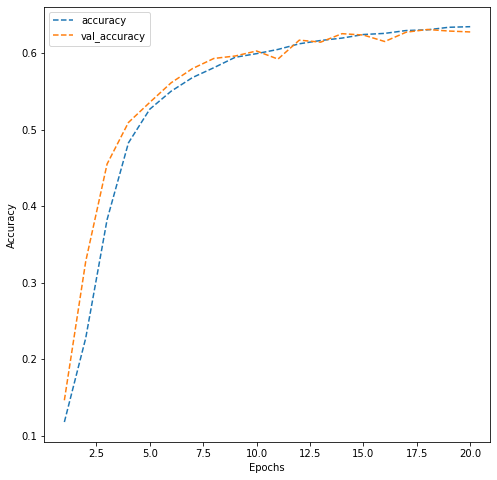

In [18]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

<Figure size 360x288 with 0 Axes>

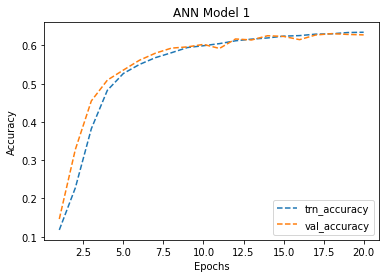

In [19]:
# plotting the accuracies (Portfolio Formatted)

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (5,4))
plt.figure(facecolor = 'white')
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'trn_accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.title('ANN Model 1')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:
*  This model is only able to achieve a level of about 63% accuracy, which is not very good.
* The training and validation performance is very similar, meaning that there is very little if any overfitting in the model.
* The model performance start to plateau after about 10 epochs

Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.

In [20]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [21]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First hidden layer with **256 nodes and relu activation**
 - Second hidden layer with **128 nodes and relu activation**
 - Add the **Dropout layer with rate equal to 0.2**
 - Third hidden layer with **64 nodes and relu activation**
 - Fourth hidden layer with **64 nodes and relu activation**
 - Fifth hidden layer with **32 nodes and relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.0005), and accuracy metric**. Do not fit the model here, just return the compiled model.
- Call the function and store the model in a new variable 
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

#### **Question 4: Build and train the new ANN model as per the above mentioned architecture (10 Marks)**

In [22]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_2():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    
    # 1 - First hidden layer with 256 nodes and relu activation and the input shape which is used above
    model.add(Dense(256, activation='relu', input_shape=(1024,)))

    # 2 - Second hidden layer with 128 nodes and relu activation
    model.add(Dense(128, activation='relu'))

    # Dropout layer with rate equal to 0.2
    model.add(Dropout(0.2))

    # 3 - Third hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu'))

    # 4 - Fourth hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu'))

    # 5 - Fifth hidden layer with 32 nodes and relu activation
    model.add(Dense(32, activation='relu'))

    # BatchNormalization layer
    model.add(BatchNormalization())

    # Output layer with softmax activation and number of nodes equal to the number of classes, which was 10 from above
    model.add(Dense(10, activation='softmax'))
    
    #declare adam optimizer with learning rate of 0.0005 
    adam = optimizers.learning_rate = 0.0005

    #compile the model with the categorical_crossentropy loss, adam optimizer (learning_rate = 0.001), and accuracy metric
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [23]:
# Build the model
model_2 = nn_model_2()

In [24]:
#Print the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [25]:
# Fit the model
history_model_2 = model_2.fit(X_train, 
                    y_train,
                    validation_split=0.2,
                    batch_size = 128, 
                    epochs=30, 
                    verbose=1)

#Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs. Store the model building history to use later for visualization.

Epoch 1/30
263/263 [==============================] - 5s 14ms/step - loss: 2.3346 - accuracy: 0.1002 - val_loss: 2.3139 - val_accuracy: 0.0985
Epoch 2/30
263/263 [==============================] - 3s 13ms/step - loss: 2.3023 - accuracy: 0.1072 - val_loss: 2.2944 - val_accuracy: 0.1225
Epoch 3/30
263/263 [==============================] - 3s 13ms/step - loss: 2.0815 - accuracy: 0.1963 - val_loss: 2.0802 - val_accuracy: 0.2286
Epoch 4/30
263/263 [==============================] - 4s 14ms/step - loss: 1.6827 - accuracy: 0.4115 - val_loss: 1.5690 - val_accuracy: 0.4737
Epoch 5/30
263/263 [==============================] - 4s 14ms/step - loss: 1.4126 - accuracy: 0.5264 - val_loss: 1.3555 - val_accuracy: 0.5450
Epoch 6/30
263/263 [==============================] - 3s 13ms/step - loss: 1.2738 - accuracy: 0.5780 - val_loss: 1.1789 - val_accuracy: 0.6145
Epoch 7/30
263/263 [==============================] - 3s 13ms/step - loss: 1.1798 - accuracy: 0.6143 - val_loss: 1.1785 - val_accuracy: 0.6108

### **Plotting the validation and training accuracies**

#### **Question 5: Write your observations on the below plot (2 Marks)**

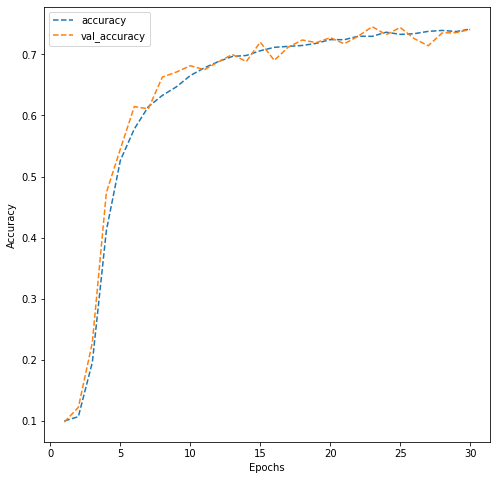

In [26]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

<Figure size 360x288 with 0 Axes>

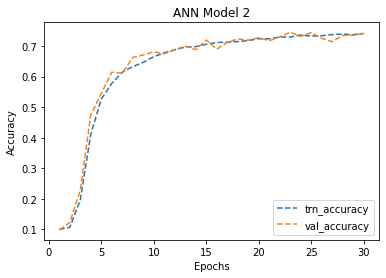

In [27]:
# plotting the accuracies (Portfolio Formatting)

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (5,4))
plt.figure(facecolor='white')
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'trn_accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.title('ANN Model 2')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()



```
# This is formatted as code
```

**Observations:
* This model performs better at around 74% accuracy and again starts to level off around 10 epochs.  Overall, this performance is still not good.
* Again, the model shows little to no overfitting.

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using classification report and the confusion matrix
- Final observations from the obtained results

In [28]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [29]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#### **Question 6: Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results (4 Marks)**

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1814
           1       0.71      0.81      0.76      1828
           2       0.76      0.77      0.76      1803
           3       0.73      0.69      0.71      1719
           4       0.74      0.83      0.78      1812
           5       0.73      0.67      0.70      1768
           6       0.79      0.68      0.73      1832
           7       0.77      0.80      0.78      1808
           8       0.66      0.72      0.69      1812
           9       0.75      0.70      0.73      1804

    accuracy                           0.74     18000
   macro avg       0.74      0.74      0.74     18000
weighted avg       0.74      0.74      0.74     18000



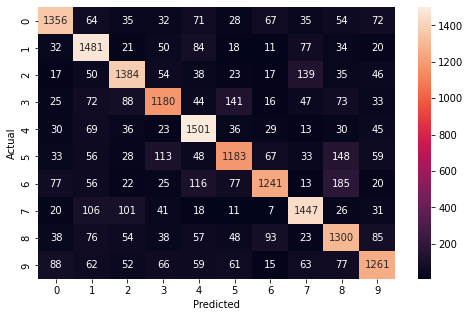

In [30]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred) #Write the code for creating confusion matrix using actual labels and predicted labels

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<Figure size 360x288 with 0 Axes>

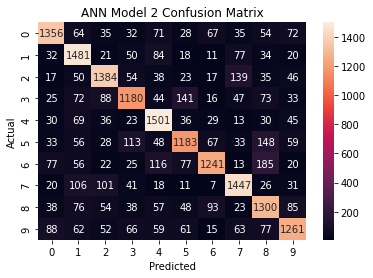

In [31]:
#For Portfolio....

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred) #Write the code for creating confusion matrix using actual labels and predicted labels

plt.figure(figsize=(5,4))
plt.figure(facecolor = 'white')
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.title('ANN Model 2 Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [32]:
#For Portfolio....

#Printing the classification report
cr_ann2 = pd.DataFrame(classification_report(y_test, test_pred, output_dict=True)).T
cr_ann2

,precision,recall,f1-score,support
0,0.790210,0.747519,0.768272,1814.000000
1,0.707935,0.810175,0.755612,1828.000000
2,0.760022,0.767610,0.763797,1803.000000
3,0.727497,0.686446,0.706375,1719.000000
4,0.737230,0.828366,0.780146,1812.000000
5,0.727552,0.669118,0.697113,1768.000000
6,0.793986,0.677402,0.731075,1832.000000
7,0.765608,0.800332,0.782585,1808.000000
8,0.662589,0.717439,0.688924,1812.000000
9,0.754187,0.699002,0.725547,1804.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 0, 'Digit')

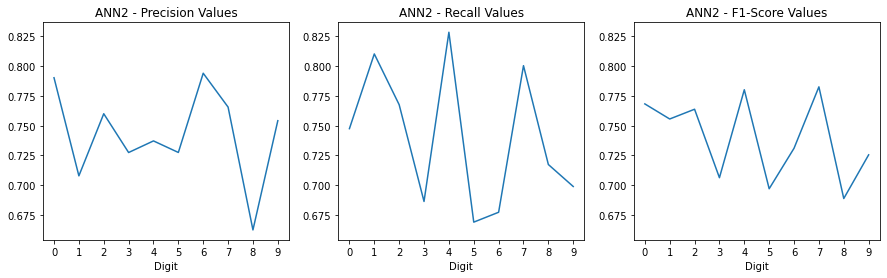

In [34]:
#STUDENT ADDED - For Portfolio, creating plots of Classification Report Scores
plt.figure(figsize=(15,4)).patch.set_facecolor('white')

plt.subplot(1,3,1, facecolor = 'white')
plt.plot(cr_ann2.index[0:10], cr_ann2.precision.iloc[0:10])
plt.title('ANN2 - Precision Values')
plt.xlabel('Digit')

plt.subplot(1,3,2, facecolor = 'white', sharey = plt.subplot(1,3,1, facecolor = 'white'))
plt.plot(cr_ann2.index[0:10], cr_ann2.recall.iloc[0:10])
plt.title('ANN2 - Recall Values')
plt.xlabel('Digit')

plt.subplot(1,3,3, facecolor = 'white', sharey = plt.subplot(1,3,1, facecolor = 'white'))
plt.plot(cr_ann2.index[0:10], cr_ann2['f1-score'].iloc[0:10])
plt.title('ANN2 - F1-Score Values')
plt.xlabel('Digit')

#### Observations (Rewritten based on "Student-Added" sections above):
* Drawing conclusions from the confusion matrix is difficult as there are different numbers of images for each digit.  This means that when comparing the different types of errors, they would need to first be normalized to draw accurate conclusions.  For a high-level review of this model, it's most useful to examine the precision, recall, and F1-score values from the classification report.  In this context, recall values can be best interpreted as the percentage of a particular category of image that was correctly identified. The precision values qualitatively represent how carefully the model classifies each image and quantitatively represents the percentage of predictions for a particular digit (category) that are correct.  In some cases, it can be seen that the digit categories with relatively low recalls have high precisions, meaning that the model correctly classifies a smaller percentage of that type of image, but does so with relatively fewer false positives.  In such a case a classification for such a number has a higher chance of being correct.
* The F1-score is hybridized metric which considers trade-off between the precision and recall, and is the best metric to examine for this model.  The F1-score would produce a lower value for digits which are identified at a high percentage but for which the predictions for that category are correct smaller percentage of the time.  Above, the number 6 is correctly identified only about 68% of the time, however, when the model predicts that an image is the number 6, it is correct about 79% of the time.  Thus, the F1 score for the number 6 is in-between these values at 73% in consideration of the implications of both on the model’s performance.
* From the prior training and validation accuracies, this model could be further refined to reduce the overfitting.  Perhaps adding another dropout earlier in the process would be helpful in reducing overfitting, though other techniques can be employed.
* As this model is only 74% accurate, additional refinements are needed to improve this model, though it is possible that an artificial neural network's inherent limitations may preclude a significant improvement in accuracy.
* The test data accuracy for the second ANN model of approximately 74.1% was the same as that predicted by its validation data accuracy of approximately 74.1%.
